# Project 2020
## Programming for Data Analysis
***
### Eibhinn Lee
### G00226502
***

#### Problem statement
Create a data set by simulating a real-world phenomenon of your choosing.
Use the numpy.random package to model and synthesise such data using Python.

Specifically, in this project you should:
• Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.
• Investigate the types of variables involved, their likely distributions, and their
relationships with each other.
• Synthesise/simulate a data set as closely matching their properties as possible.
• Detail your research and implement the simulation in a Jupyter notebook – the
data set itself can simply be displayed in an output cell within the notebook.

Note that this project is about simulation – you must synthesise a data set. Some
students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set. The next section
gives an example project idea.


https://medium.com/@ingeh/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed

### Dataset Info
***
For the purpose of the project, I manually create a dataset relating to horse racing.
To delve deeper, I created a dataset using the top 112 Steeplechasers rated from the 2019-2020 season.
This information can be found at the following URL with information solely taken from page 2.
https://support.racingadmin.co.uk/opencms/export/sites/weatherbys/racing-admin-support/.galleries/racing-admin-downloads/anglo-irish-jump-classification.pdf

The rationale behind creating this dataset was two-fold, 1) I'm interested in the sport and 2) I can randomly generate data closely related to the initial dataframe that I created.

#### Variables used and explained
***
Rating - Each racehorse that runs under the rules of racing will get a rating. If a horse has not run yet in its life, it will be restricted to certain races that will be under the same conditions for each horse until it has received a rating. Each jursdiction both sides of the Irish sea employ a team of people known as 'handicappers' who review, analyse and set ratings for racehorses. Generally, ratings are choosen by how each horse has run, the race type in ran in, the class of race, the time of the race along with other factors.

Name - Every horse is named and registered with the regulatory body. Every horse has a passport to distinguish exactly is the correct horse present on the day of the race.

Distance - for the dataset, I decided to classify this variable into three as given by the "ANGLO-IRISH STEEPLECHASE CLASSIFICATION". In the classification, the three groups are:
- 2 miles 7f+ 
- 2 miles 3f to 2 miles 6.5f
- 2 miles to 2 miles 2.5f

For my dataset, I simply used:
- Staying (2 miles 7f+)
- Intermediate (2 miles 3f to 2 miles 6.5f)
- Minimum (2 miles to 2 miles 2.5f)

Bred - Is a straightforward variable indicating what country the horse was bred. For official purposes, this is generally provided at the end of the horses name e.g 'FR', 'GB', 'IRE'

Location - is a variable I came up with to describe where the horse is trained

Age - age of the horse at the time of the project. All horses will offically be 1 year older on 1st January day regardless of the month they were born.

Novice -  novice is a term used to describe a horse in its first year at a discipline. In the case of the dataset, all are under the same discipline which is Steeplechase. But other disciplines are 'flat' and 'hurdles'. Generally speaking but not always the case, horses progress from flat to hurdles to steeplechases and the first year in each discipline they will be classified as a novice.

Sex - male or female.

### Import Libraries required.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset

In [3]:
# Using pandas to import dataframe as a csv
# dataset saved to github

df = pd.read_csv("https://raw.githubusercontent.com/EibhinnLee/Project-2020---Programming-for-Data-Analysis/main/Horses_Dataset_Project2020.txt")
df

,Rating,Name,Distance,Bred,Location,Age,Novice,Sex
0,173,Al Boum Photo,Staying,French,IRE,8,N,Male
1,173,Cyrname,Intermedate,French,UK,8,N,Male
2,172,Santini,Staying,British,UK,8,N,Male
3,172,Chacun Pour Soi,Minimum,French,IRE,8,N,Male
4,171,Clan des Obeaux,Staying,French,UK,8,N,Male
...,...,...,...,...,...,...,...,...
108,152,Nube Negra,Minimum,Spainish,UK,6,Y,Male
109,152,Sam Brown,Intermediate,British,UK,8,Y,Male
110,152,Ordinary World,Minimum,Irish,IRE,10,N,Male
111,152,Top Notch,Intermediate,French,UK,9,N,Male


https://www.geeksforgeeks.org/python-pandas-dataframe-set_index/

https://web.microsoftstream.com/video/db8801fe-9e42-4663-a508-5d6f38bb7327



https://www.geeksforgeeks.org/how-to-add-empty-column-to-dataframe-in-pandas/

Adding new columns to original dataframe

https://stackoverflow.com/questions/29517072/add-column-to-dataframe-with-constant-value

Adding column with data to dataframe

Adding 4 new columns to the orginal Dataset.
They are as follows:
- Retire - Will the horse be retired at the end of the year.
- 2020_#_Runs - How many times will the horse run in the coming season
- 2020_Distance - Will the horse run over the same or different distances this season
- 2020_Rating - What will the rating of the horse be by the end of the upcoming season.






https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html


In [4]:
# Adding a new column with data to original dataframe.
# results i expect are a simple 'yes' or 'no' value.

# creating a list of the values.
a = ["yes","no"]

# using the numpy.random package to randomly choose whether or not the horse will retire by the end of the upcoming season.
df['Retire'] = np.random.choice(a, len(df))

In [5]:
# Adding a second new column with data to original dataframe.
# results will vary with an expectation value of 4 which would be about average for the number of races a horse whould run in.
# This numpy.random function allows this to show that not every horse will run that many times or will in fact run more times.

# using the numpy.random.poisson function to randomly show the varying integer in and around the expectation value of 4.
df['2020_#_Runs'] = np.random.poisson(4, len(df))

In [6]:
# Adding a third new column with data to original dataframe.
# results expected are from data within the orginal dataframe imported by pandas.
# This will distinguish whether a horse will maintain the distance for the coming season or will be revert to a different distance.

# list containg the three values
b = ["Staying", "Intermediate", "Minimum"]

# using the numpy.random package to randomly choose whether the horse will remain or change distance.
df['2020_Distance'] = np.random.choice(b, len(df))

https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/?ref=rp

In [7]:
# Adding a forth new column with data to original dataframe.
# using the numpy.random.poisson function
# the function will take the value in the Rating colum as N and apply the function to generate a new value
# the new value generated will be the rating the horse will receive at the end of the upcoming season.


df['2020_Rating'] = np.random.poisson(df['Rating'], len(df))

In [8]:
# df now includes original dataframe along with new columns and data
df

,Rating,Name,Distance,Bred,Location,Age,Novice,Sex,Retire,2020_#_Runs,2020_Distance,2020_Rating
0,173,Al Boum Photo,Staying,French,IRE,8,N,Male,no,4,Intermediate,167
1,173,Cyrname,Intermedate,French,UK,8,N,Male,no,0,Staying,158
2,172,Santini,Staying,British,UK,8,N,Male,yes,4,Intermediate,159
3,172,Chacun Pour Soi,Minimum,French,IRE,8,N,Male,yes,11,Minimum,172
4,171,Clan des Obeaux,Staying,French,UK,8,N,Male,no,4,Minimum,177
...,...,...,...,...,...,...,...,...,...,...,...,...
108,152,Nube Negra,Minimum,Spainish,UK,6,Y,Male,yes,3,Minimum,145
109,152,Sam Brown,Intermediate,British,UK,8,Y,Male,no,5,Intermediate,159
110,152,Ordinary World,Minimum,Irish,IRE,10,N,Male,no,4,Minimum,151
111,152,Top Notch,Intermediate,French,UK,9,N,Male,yes,2,Staying,147


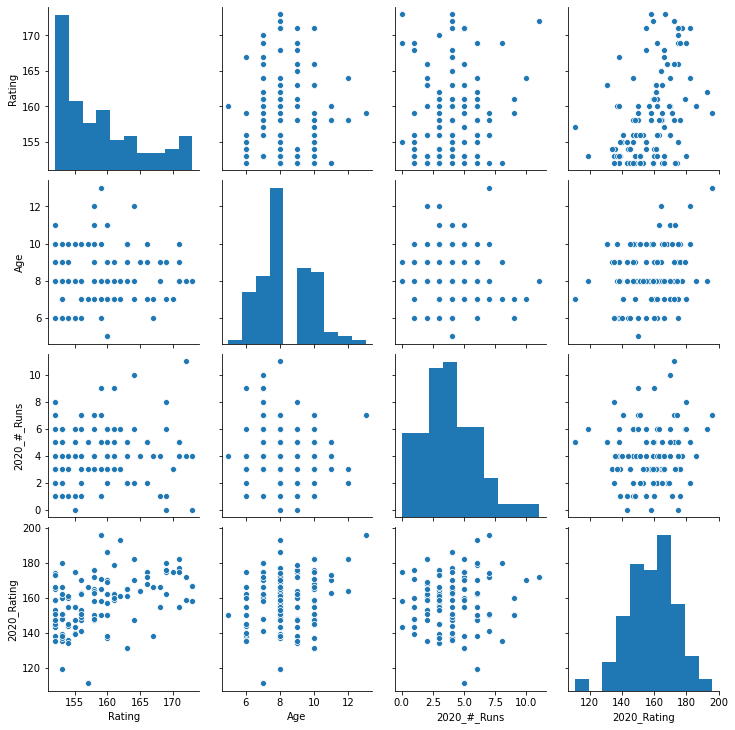

In [9]:
sns.pairplot(df)

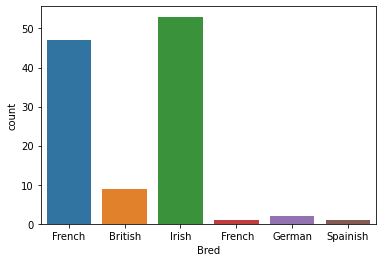

In [11]:
# Bar chart showing the amount of horses that were bred in each country
# You can see that the level of Irish bred horses is highest with French bred next.

sns.countplot(x = 'Bred', data=df)

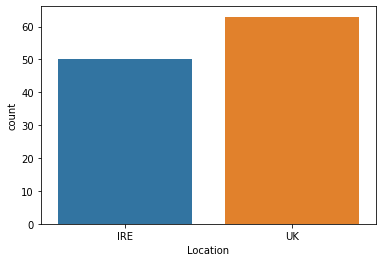

In [12]:
# The divide of where the top rated horses are trained
sns.countplot(x = 'Location', data=df)

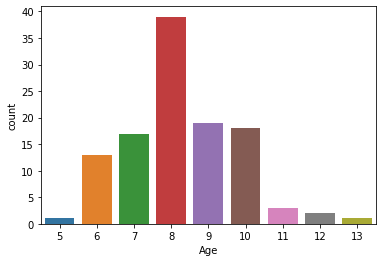

In [13]:
# Graph showing the agr profile of the horses 
sns.countplot(x = 'Age', data=df)

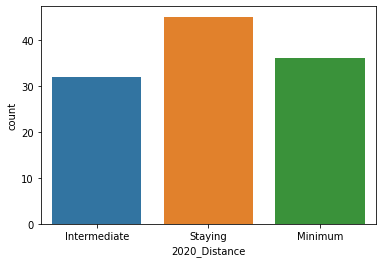

In [15]:
# predicted breakdown of the number of horses running in each distance for 2020
sns.countplot(x = '2020_Distance', data=df)

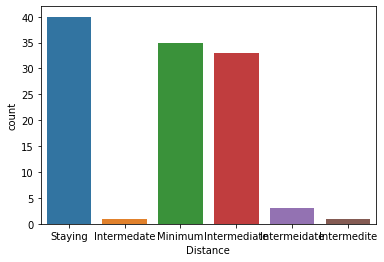

In [16]:
# need to amend!!!!!!!!!!!
sns.countplot(x = 'Distance', data=df)

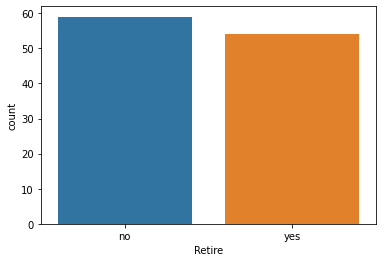

In [17]:
# number of horses to retire

sns.countplot(x = 'Retire', data=df)

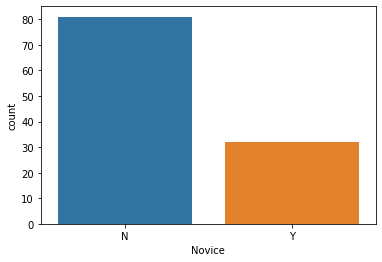

In [18]:
# need to review amounts !!!!!!!!!!
sns.countplot(x = 'Novice', data=df)

In [19]:
sns.countplot(x = 'Sex', data=df)

ValueError: Could not interpret input 'Sex'

### Glossary
Steeplechase
mile 
furlong

### Reference list

https://support.racingadmin.co.uk/opencms/export/sites/weatherbys/racing-admin-support/.galleries/racing-admin-downloads/anglo-irish-jump-classification.pdf